In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [26]:
warnings.filterwarnings("ignore")
df = pd.read_csv('wine.csv')

In [27]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [29]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


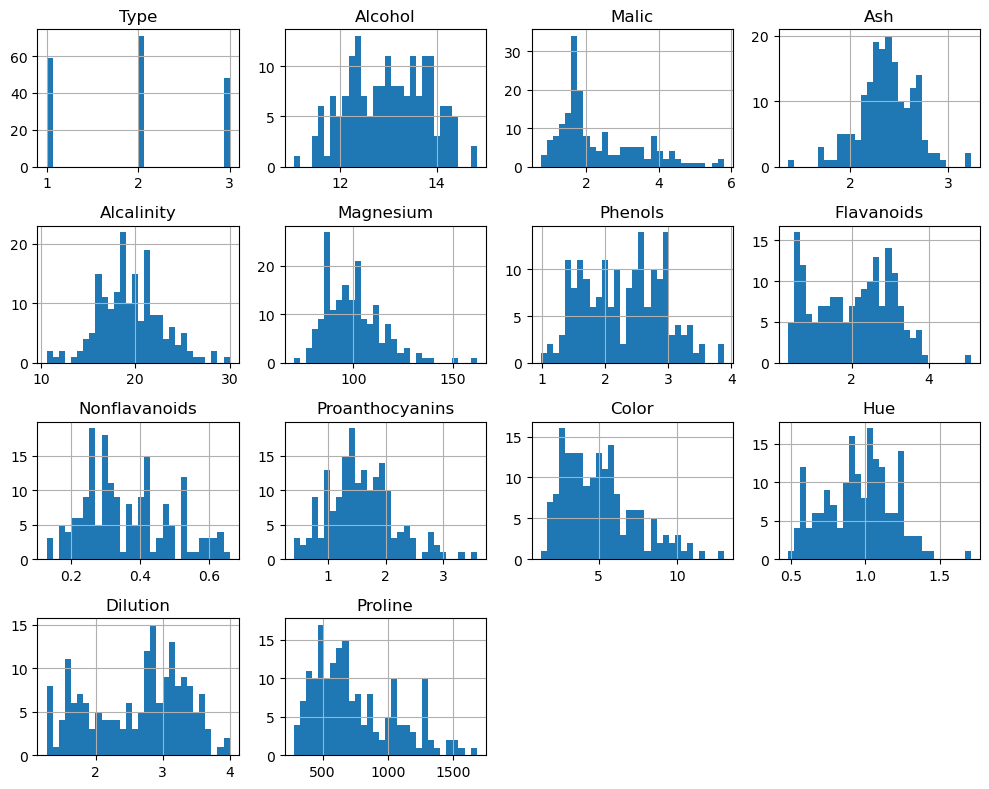

In [30]:
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

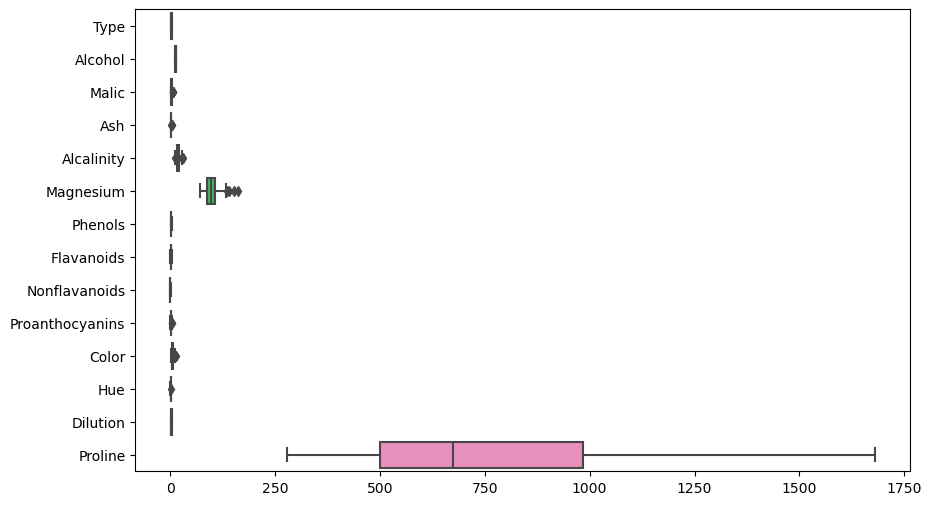

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')  # 'h' for horizontal
plt.show()

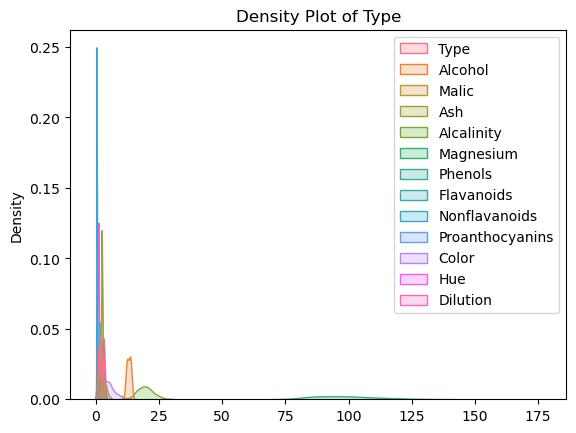

In [32]:
target = df[['Proline']]
feature = df.drop('Proline', axis = 1)

sns.kdeplot(feature, shade=True)
plt.title('Density Plot of Type')
plt.show()

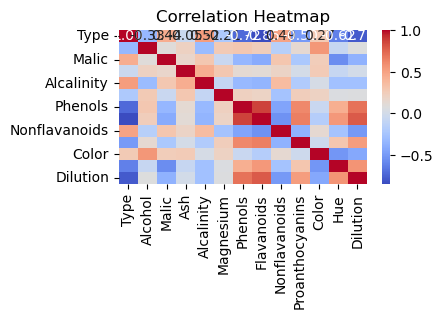

In [33]:
# Compute correlation matrix
correlation_matrix = feature.corr()
# Plot correlation heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
##Task 2: Dimensionality Reduction with PCA:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (142, 13)
Testing Features (X_test): (36, 13)
Training Target (y_train): (142, 1)
Testing Target (y_test): (36, 1)


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature)
# Fit and transform the training data, then transform the test data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

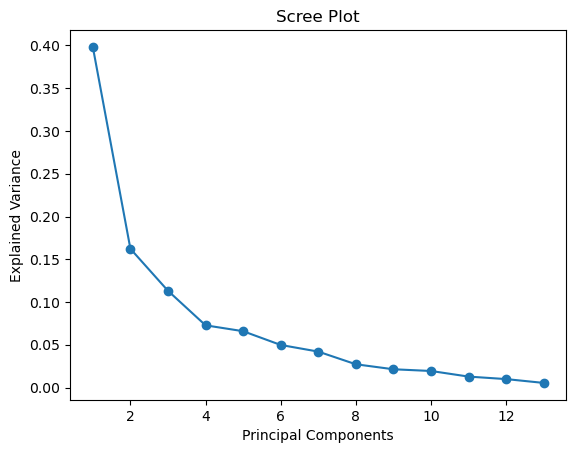

In [37]:
pca = PCA()

# Fit PCA on the standardized training data
pca.fit(X_train_standardized)

# 4. Determine the optimal number of principal components
# a. Scree plot to visualize the explained variance
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

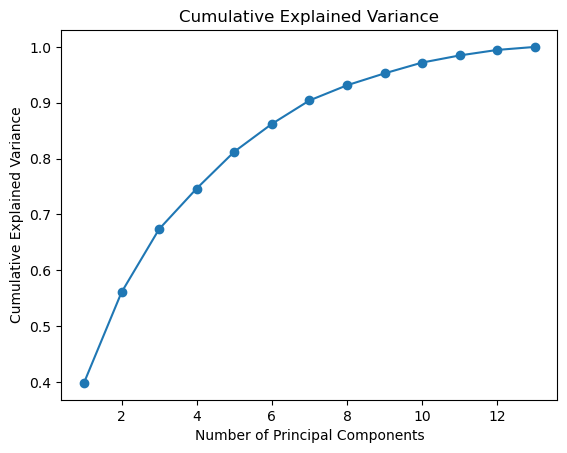

In [38]:
# b. Cumulative explained variance to determine how many components explain 95% of the variance
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


In [39]:
# Determine the number of components needed to explain 95% of the variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to explain 95% of variance: {optimal_components}")

# 5. Transform the dataset into the principal components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(feature)
# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_standardized)

# Transform the test data
X_test_pca = pca.transform(X_test_standardized)

Optimal number of components to explain 95% of variance: 9


In [40]:
##Task 3: Clustering with Original Data:

In [41]:
# Check the shape of the data after scaling
print(f"X_train_scaled shape: {X_train_standardized.shape}")
print(f"X_test_scaled shape: {X_test_standardized.shape}")

X_train_scaled shape: (142, 13)
X_test_scaled shape: (36, 13)


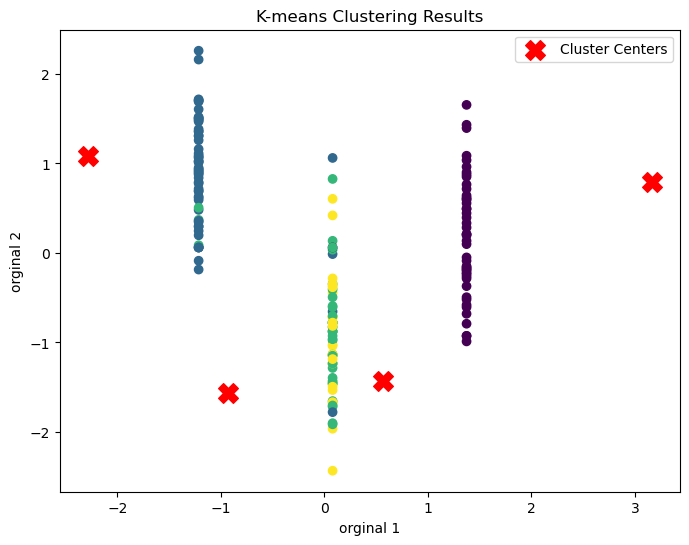

In [42]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.fit_predict(X_scaled) 
labels = kmeans.labels_

# Add the cluster labels to the dataset
df = pd.DataFrame(X_scaled, columns=["Type","Alcohol","Malic","Ash","Alcalinity","Magnesium","Phenols","Flavanoids","Nonflavanoids","Proanthocyanins","Color","Hue","Dilution"])
df['Proline'] = labels

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-means Clustering Results')
plt.xlabel('orginal 1')
plt.ylabel('orginal 2')

# Plot the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.legend()
plt.show()

In [43]:
# Evaluate clustering performance using Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score}")

# Evaluate clustering performance using Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.24028041012512782
Davies-Bouldin Index: 1.754240895686149


In [44]:
##Task 4: Clustering with PCA Data:

In [45]:

# Apply K-Means clustering to the PCA-transformed data
scaler = StandardScaler()
data_scaled_train = scaler.fit_transform(X_train)

# Step 1.2: Apply PCA and test different numbers of principal components
num_components_list = [2,5,8]
silhouette_scores = []

# Step 1.3: Apply K-Means Clustering to PCA-transformed data
for n_components in num_components_list:
    # Apply PCA with n components
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(data_scaled_train)
    
    # Apply K-Means clustering with the known number of wine types (3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_reduced)
    
    # Evaluate clustering performance using silhouette score
    score = silhouette_score(X_reduced, cluster_labels)
    silhouette_scores.append(score)


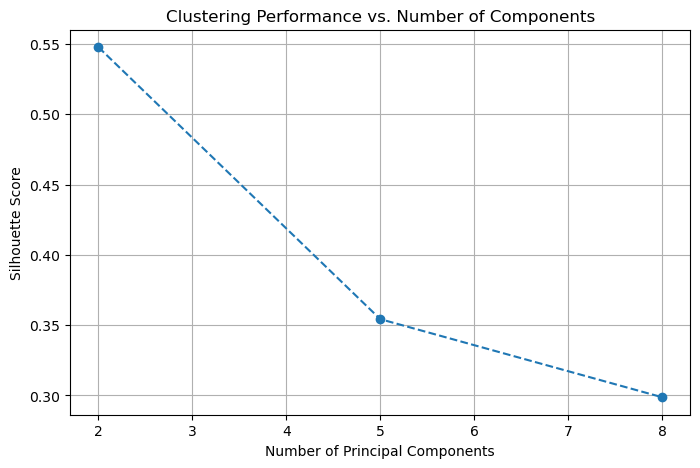

[(2, 0.5477803022629896), (5, 0.35431679623088413), (8, 0.2987734374623436)]

In [46]:
# Plot silhouette scores for different numbers of principal components
plt.figure(figsize=(8, 5))
plt.plot(num_components_list, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Silhouette Score")
plt.title("Clustering Performance vs. Number of Components")
plt.grid()
plt.show()

# Print scores
